In [93]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [147]:
def normal_sample(N, random_state=None):
    np.random.seed(random_state)
    return np.random.normal(0, 1, N)

def brownian_motion(T, N, random_state=None):
    dW = normal_sample(N) * sqrt (T / N)
    return np.insert(dW.cumsum(), 0, 0)

def correlated_sample (sample, rho):
    uncorrelated_sample = normal_sample(len(sample))
    return rho * sample + sqrt(1 - rho ** 2) * uncorrelated_sample

def correlated_brownian_motions(T, N, rho, random_state=None):
    sample1 = normal_sample(N)
    sample2 = correlated_sample(sample1, rho)
    dW1 = sample1 * sqrt (T / N)
    dW2 = sample2 * sqrt (T / N)
    return np.asarray([np.insert(dW1.cumsum(), 0, 0), np.insert(dW2.cumsum(), 0, 0)]).T

def GBM(T, N, mu, sigma, S_0, random_state=None):
    time = np.linspace(0, T, N+1)
    W = brownian_motion(T, N)
    S = S_0 * np.exp((mu - (sigma ** 2) / 2) * time + sigma * W)
    return (S)

def UO (T, N, alpha, gamma, sigma, S_0, random_state=None):
    time = np.linspace(0, T, N+1)
    dW = normal_sample(N) * sqrt (T / N)
    integral = np.insert(np.cumsum(np.exp(alpha * time[1:]) * dW), 0, 0)
    S = S_0 * np.exp(-alpha * time) + gamma * (1 - np.exp(-alpha * time)) + \
    sigma * np.exp(-alpha * time) * integral
    return S

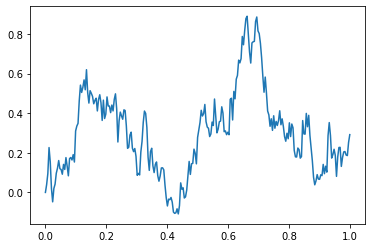

In [110]:
plt.plot(np.linspace(0,1,253), brownian_motion(1, 252))

In [89]:
correlated_brownian_motions(1, 252, 0.6)

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 5.70027390e-02,  1.21360776e-01],
       [ 1.47092096e-01,  1.45161669e-01],
       [ 1.70790531e-01,  1.84974993e-01],
       [ 2.13705814e-01,  1.54547248e-01],
       [ 3.18328087e-01,  2.29202885e-01],
       [ 3.00868466e-01,  2.57815428e-01],
       [ 4.08391143e-01,  2.95880025e-01],
       [ 4.08765299e-01,  2.94416344e-01],
       [ 3.17165973e-01,  2.32173223e-01],
       [ 2.92992362e-01,  2.70403886e-01],
       [ 2.39482471e-01,  2.54995343e-01],
       [ 2.84360086e-01,  3.39310313e-01],
       [ 3.44519028e-01,  4.14771038e-01],
       [ 3.11359376e-01,  4.42577716e-01],
       [ 2.24281896e-01,  3.23627460e-01],
       [ 2.40907997e-01,  2.87784961e-01],
       [ 1.91453861e-01,  2.28501110e-01],
       [ 1.49576358e-01,  2.09051096e-01],
       [ 1.57822210e-01,  3.10579173e-01],
       [ 1.18721318e-01,  2.99588958e-01],
       [ 1.70071832e-01,  3.17122818e-01],
       [ 1.34431834e-01,  2.86628316e-01],
       [ 2.

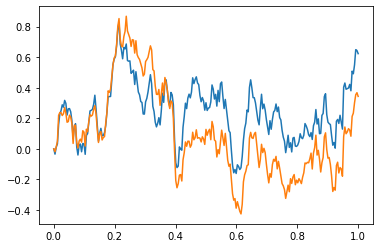

In [92]:
plt.plot(np.linspace(0, 1, 253), correlated_brownian_motions(1, 252, 0.9))

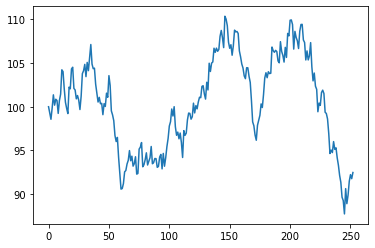

In [114]:
plt.plot(GBM(1, 252, 0.2, 0.2, 100))

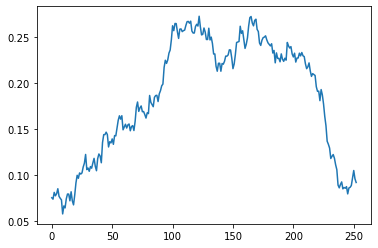

In [154]:
plt.plot(UO(1, 252, 1, 0.055, 0.1, 0.075))